In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Floating ball using secant method

We're searching for x, such that the following equilibrium becomes true:
$$\frac{\pi x^2}{3}(3r-x)\rho_L g = Mg$$

Which means we are looking for root of the following equation which will also be our Secant function:
$$\frac{\pi x^2}{3}(3r-x)\rho_L - M = 0$$
Parameters:

| Physical value | variable name | description |
|:------------------:|:------------------:|:------------------:|
| $M$      | `M`                 | mass of the ball                                 |
| $\rho_L$ | `rL`                | density of liquid                                |
| $g$      | `g`                 | standard acceleration of free fall               |
| $x$      | `x`                 | submersion depth |
| $r$      | `r`                | ball's radius                                    |
| $\epsilon$ | `eps` | acceptance criteria|


In [130]:
M = 3000
g = 9.81
r = 10
rL = 1
eps = 1e-16
g_force = M * g

In [131]:
def force_delta(x):
    return g*rL*(3*r-x)*(np.pi*x**2)/3 - g_force

def next_approx(x_0, x_1):
    return (b_force(x_1)*x_0-b_force(x_0)*x_1)/(b_force(x_1)-b_force(x_0))


x_0 = 0.1 # ball floating
x_1 = 2*r # ball fully submerged 
xs = [x_0, x_1]
errs = [abs(force_delta(x_0)), abs(force_delta(x_1))]
err = errs[1]
while err > eps:
    new_x = next_approx(x_0, x_1)
    x_0 = x_1
    x_1 = new_x
    err = abs(force_delta(x_1))
    xs.append(x_1)
    errs.append(err)

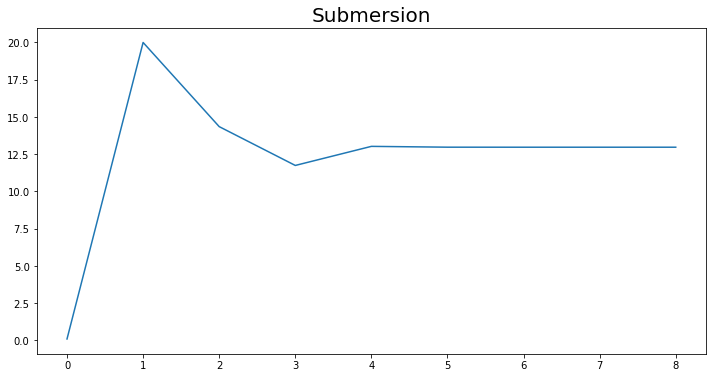

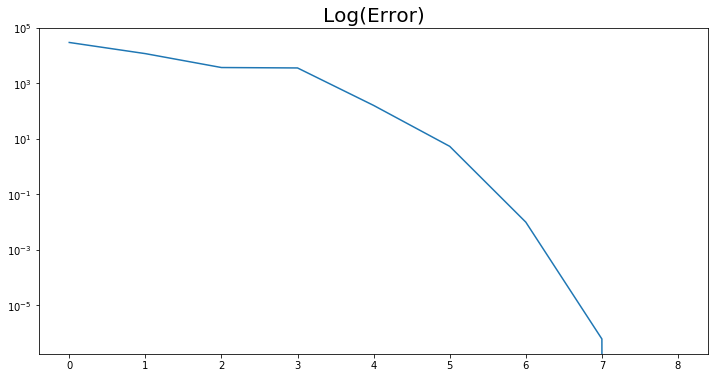

In [132]:
plt.figure(figsize=(12,6))
plt.title("Submersion", fontsize=20)
plt.plot(xs, label="Submersion")
plt.figure(figsize=(12,6))
plt.title("Log(Error)", fontsize=20)
plt.plot(errs, label="Error")
plt.yscale("log")